#### DOWANLOAD DATA OSM using QGIS
- https://www.qgistutorials.com/en/docs/downloading_osm_data.html

In [75]:
import os
import subprocess

# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'inputs')
output_dir = os.path.join(path, 'outputs')

# open folder
subprocess.Popen(f'explorer "{output_dir}"')

In [2]:
import pandas as pd

In [3]:
data = 'olsztyn_page_all_pages_20240106151418.csv'
df = pd.read_csv(os.path.join(os.getcwd(), 'inputs', data))

In [4]:
df = df.head(10)

In [5]:
df.columns

Index(['free_text', 'address', 'price', 'price_meter', 'rooms', 'area', 'more',
       'add_link'],
      dtype='object')

In [6]:
df['address'][2]

'Mieszkanie na sprzedaż: ul. Władysława Gębika 59, Pieczewo, Olsztyn, warmińsko-mazurskie'

In [7]:
df['address_new'] = df['address'].str.replace('Mieszkanie na sprzedaż: ', '', regex=True)
df['address_new'] = df['address_new'].str.replace('ul. ', '', regex=True)

In [8]:
df['address_new'][:3]

0    Olimpijska 21, Likusy, Olsztyn, warmińsko-mazu...
1    Floriana Piotrowskiego, Jaroty, Olsztyn, warmi...
2    Władysława Gębika 59, Pieczewo, Olsztyn, warmi...
Name: address_new, dtype: object

In [9]:
df['address'][0]

'Mieszkanie na sprzedaż: Olimpijska 21, Likusy, Olsztyn, warmińsko-mazurskie'

In [10]:
import geocoder
g = geocoder.osm('48a Elgnowo')
g.osm

# 'Longitude'   g.osm['x']
# 'Latitude'  g.osm['y']
for i in list(df.index):
    print(df.loc[i, 'address_new'])
    g = geocoder.osm(df.loc[i, 'address_new'])
    try:
        df.loc[i, 'Longitude'] =  g.osm['x']
        df.loc[i, 'Latitude'] =  g.osm['y']
    except:
        df.loc[i, 'Longitude'] = df.loc[i, 'Latitude'] = None


        

Olimpijska 21, Likusy, Olsztyn, warmińsko-mazurskie
Floriana Piotrowskiego, Jaroty, Olsztyn, warmińsko-mazurskie
Władysława Gębika 59, Pieczewo, Olsztyn, warmińsko-mazurskie
Mieczysława Orłowicza 10, Nagórki, Olsztyn, warmińsko-mazurskie
Borowa, Podleśna, Olsztyn, warmińsko-mazurskie
Leśna, Osiedle Nad Jeziorem Długim, Olsztyn, warmińsko-mazurskie
Dajtki, Olsztyn, warmińsko-mazurskie
Kazimierza Jaroszyka, Jaroty, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie


In [11]:
df

,free_text,address,price,price_meter,rooms,area,more,add_link,address_new,Longitude,Latitude
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459 000 zł,16 393 zł/m²,2 pokoje,28 m²,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...,"Olimpijska 21, Likusy, Olsztyn, warmińsko-mazu...",20.441561,53.784478
1,Przestronne 3pokojowe mieszkanie w Centrum Jarot!,Mieszkanie na sprzedaż: ul. Floriana Piotrowsk...,630 000 zł,9251 zł/m²,3 pokoje,"68,1 m²",Biuro nieruchomości,/pl/oferta/przestronne-3pokojowe-mieszkanie-w-...,"Floriana Piotrowskiego, Jaroty, Olsztyn, warmi...",20.492239,53.737495
2,Mieszkanie 3 pokoje Pieczewo Olsztyn,Mieszkanie na sprzedaż: ul. Władysława Gębika ...,549 000 zł,8318 zł/m²,3 pokoje,66 m²,Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-pieczewo-olszty...,"Władysława Gębika 59, Pieczewo, Olsztyn, warmi...",20.513795,53.736222
3,Mieszkanie 3 pokoje świetna lokalizacja Olsztyn,Mieszkanie na sprzedaż: ul. Mieczysława Orłowi...,429 000 zł,7103 zł/m²,3 pokoje,"60,4 m²",Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-swietna-lokaliz...,"Mieczysława Orłowicza 10, Nagórki, Olsztyn, wa...",20.492031,53.754373
4,"OKAZJA 3 pok podleśna BOROWA, NOWE BUDOWNICTWO...","Mieszkanie na sprzedaż: ul. Borowa, Podleśna, ...",520 000 zł,10 000 zł/m²,3 pokoje,52 m²,52 m²,/pl/oferta/okazja-3-pok-podlesna-borowa-nowe-b...,"Borowa, Podleśna, Olsztyn, warmińsko-mazurskie",20.503198,53.796634
5,Os. Leśna| 4- pokojowe mieszkanie A.III/48,"Mieszkanie na sprzedaż: ul. Leśna, Osiedle Nad...",983 326 zł,11 300 zł/m²,4 pokoje,"87,02 m²",Inwestycja deweloperska,/pl/oferta/os-lesna-4-pokojowe-mieszkanie-a-ii...,"Leśna, Osiedle Nad Jeziorem Długim, Olsztyn, w...",20.464831,53.781049
6,Apartament | A244 z bocznym widokiem na jezioro,"Mieszkanie na sprzedaż: Dajtki, Olsztyn, warmi...",NaN,NaN,2 pokoje,"32,76 m²",Inwestycja deweloperska,/pl/oferta/apartament-a244-z-bocznym-widokiem-...,"Dajtki, Olsztyn, warmińsko-mazurskie",20.422402,53.768218
7,3-pokojowe mieszkanie przy ul. Jaroszyka,Mieszkanie na sprzedaż: ul. Kazimierza Jaroszy...,439 000 zł,9052 zł/m²,3 pokoje,"48,5 m²",Biuro nieruchomości,/pl/oferta/3-pokojowe-mieszkanie-przy-ul-jaros...,"Kazimierza Jaroszyka, Jaroty, Olsztyn, warmińs...",20.489794,53.741642
8,Apartament na Gutkowie - stan deweloperski !,Mieszkanie na sprzedaż: ul. Księdza Kordeckieg...,569 781 zł,7050 zł/m²,4 pokoje,"80,82 m²",Biuro nieruchomości,/pl/oferta/apartament-na-gutkowie-stan-dewelop...,"Księdza Kordeckiego, Gutkowo, Olsztyn, warmińs...",20.388072,53.801191
9,"Apartament Bud."" B"" 80m2 4pok +ogródek ok 200m2",Mieszkanie na sprzedaż: ul. Księdza Kordeckieg...,569 781 zł,7050 zł/m²,4 pokoje,"80,82 m²",Biuro nieruchomości,/pl/oferta/apartament-bud-b-80m2-4pok-ogrodek-...,"Księdza Kordeckiego, Gutkowo, Olsztyn, warmińs...",20.388072,53.801191


In [12]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# converting dataframe to geodataframe
points = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)).set_crs("EPSG:4326")


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


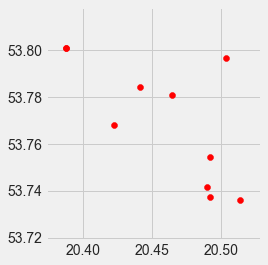

In [13]:
# We can now plot our ``GeoDataFrame``.
points.plot(color='red')
plt.show()

In [15]:
# save dataframe to csv
points.to_csv(os.path.join(output_dir, f'points_olsztyn.csv'), encoding='utf-8', index=False)

In [31]:
import pandas as pd
import geocoder

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

data = 'olsztyn_page_all_pages_20240106151418.csv'
df = pd.read_csv(os.path.join(os.getcwd(), 'inputs', data))


# prepering the address data for geocoder 
df['address_new'] = df['address'].str.replace('Mieszkanie na sprzedaż: ', '', regex=True)
df['address_new'] = df['address_new'].str.replace('ul. ', '', regex=True)
df['address_new'] = df['address_new'].str.replace('al. ', '', regex=True)


# 'Longitude'   g.osm['x']
# 'Latitude'  g.osm['y']
for i in list(df.index):
    print(df.loc[i, 'address_new'])
    g = geocoder.osm(df.loc[i, 'address_new'])
    try:
        df.loc[i, 'Longitude'] =  g.osm['x']
        df.loc[i, 'Latitude'] =  g.osm['y']
    except:
        df.loc[i, 'Longitude'] = df.loc[i, 'Latitude'] = None

        
# saving dataframe to csv
points.to_csv(os.path.join(output_dir, f'points_olsztyn.csv'), encoding='utf-8', index=False)


Olimpijska 21, Likusy, Olsztyn, warmińsko-mazurskie
Floriana Piotrowskiego, Jaroty, Olsztyn, warmińsko-mazurskie
Władysława Gębika 59, Pieczewo, Olsztyn, warmińsko-mazurskie
Mieczysława Orłowicza 10, Nagórki, Olsztyn, warmińsko-mazurskie
Borowa, Podleśna, Olsztyn, warmińsko-mazurskie
Leśna, Osiedle Nad Jeziorem Długim, Olsztyn, warmińsko-mazurskie
Dajtki, Olsztyn, warmińsko-mazurskie
Kazimierza Jaroszyka, Jaroty, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Księdza Kordeckiego, Gutkowo, Olsztyn, warmińsko-mazurskie
Dworcowa, Pojezierze, Olsztyn, warmińsko-mazurskie
Redykajny, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie


Adama Mickiewicza, Osiedle Kościuszki, Olsztyn, warmińsko-mazurskie
Marii Zientary-Malewskiej, Podleśna, Olsztyn, warmińsko-mazurskie
Dworcowa 16, Pojezierze, Olsztyn, warmińsko-mazurskie
Henryka Sienkiewicza, Zatorze, Olsztyn, warmińsko-mazurskie
Stawigudzka 14, Jaroty, Olsztyn, warmińsko-mazurskie
Wyzwolenia, Śródmieście, Olsztyn, warmińsko-mazurskie
Kołobrzeska 36B, Pojezierze, Olsztyn, warmińsko-mazurskie
Aleja Wojska Polskiego 20, Osiedle Wojska Polskiego, Olsztyn, warmińsko-mazurskie
Franciszka Barcza, Nagórki, Olsztyn, warmińsko-mazurskie
Flisa Marcina, Jaroty, Olsztyn, warmińsko-mazurskie
Biskupa Tomasza Wilczyńskiego, Jaroty, Olsztyn, warmińsko-mazurskie
Aleja Przyjaciół, Osiedle Nad Jeziorem Długim, Olsztyn, warmińsko-mazurskie
Franciszka Barcza 50, Nagórki, Olsztyn, warmińsko-mazurskie
gen. Józefa Hallera 4b, Osiedle Generałów, Olsztyn, warmińsko-mazurskie
Jana Janowicza 5, Jaroty, Olsztyn, warmińsko-mazurskie
Bartąska, Jaroty, Stawiguda, olsztyński, warmińsko-mazurskie
Alej

Gutkowo, Olsztyn, warmińsko-mazurskie
Kardynała Stefana Wyszyńskiego, Kormoran, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Władysława Gębika, Pieczewo, Olsztyn, warmińsko-mazurskie
Edwarda Mroza, Jaroty, Olsztyn, warmińsko-mazurskie
Hanki Sawickiej, Podleśna, Olsztyn, warmińsko-mazurskie
Gutkowo, Olsztyn, warmińsko-mazurskie
Kardynała Stefana Wyszyńskiego, Kormoran, Olsztyn, warmińsko-mazurskie
Wojciecha Kętrzyńskiego, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Jaroty, Olsztyn, warmińsko-mazurskie
Dworcowa, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Stefana Okrzei, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Partyzantów, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Gutkowo, Olsztyn, warmińsko-mazurskie
Kardynała Stefana Wyszyńskiego, Kormoran, Olsztyn, warmińsko-mazurskie
Wojciecha Kętrzyńskiego, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, war

Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Osiedle Kościuszki, Olsztyn, warmińsko-mazurskie
Wyzwolenia, Śródmieście, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Jarosława Iwaszkiewicza, Podgrodzie, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Kormoran, Olsztyn, warmińsko-mazurskie
Tadeusza Kościuszki, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Poprzeczna, Podleśna, Olsztyn, warmińsko-mazurskie
gen. Franciszka Kleeberga, Osiedle Generałów, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Zatorze, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Wyzwolenia, Śródmieście, Olsztyn, warmińsko-mazurskie
Aleja W

Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Aleja Warszawska, Kortowo, Olsztyn, warmińsko-mazurskie
Wojciecha Kętrzyńskiego, Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Aleja Wojska Polskiego, Osiedle Wojska Polskiego, Olsztyn, warmińsko-mazurskie
Aleja Wojska Polskiego, Osiedle Wojska Polskiego, Olsztyn, warmińsko-mazurskie
Aleja Wojska Polskiego, Osiedle Wojska Polskiego, Olsztyn, warmińsko-mazurskie
Aleja Wojska Polskiego, Osiedle Wojska Polskiego, Olsztyn, warmińsko-mazurskie
A

Jagiellońska, Podleśna, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Stare Miasto, Śródmieście, Olsztyn, warmińsko-mazurskie
Słoneczna, Kortowo, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Ratuszowa, Śródmieście, Olsztyn, warmińsko-mazurskie
Poprzeczna, Podleśna, Olsztyn, warmińsko-mazurskie
Olimpijska, Likusy, Olsztyn, warmińsko-mazurskie
Bałtycka, Osiedle Nad Jeziorem Długim, Olsztyn, warmińsko-mazurskie
Słoneczna, Kortowo, Olsztyn, warmińsko-mazurskie
Słoneczna, Kortowo, Olsztyn, warmińsko-mazurskie
Słoneczna, Kortowo, Olsztyn, warmińsko-mazurskie
Redykajny, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Stanisława Lewandowskiego, Osiedle Generałów, Olsztyn, warmińsko-mazurskie
Osiedle Kętrzyńskiego, Olsztyn, warmińsko-mazurskie
Marcina Kasprzaka, Osiedle Kościuszki, Olsztyn, warmińsko-mazurskie
Śródmieście, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsztyn, warmińsko-mazurskie
Sielska, Dajtki, Olsz

In [40]:
# removing rows with NONE lat and long
rows_without_coordinates = df['Longitude'].isnull().sum() 
print(f'Number of rows without coordinates {rows_without_coordinates}')
points_data = df.dropna(subset=['Longitude'])
points_data['Longitude'].isnull().sum() 

Number of rows without coordinates 52


0

In [41]:
# converting dataframe  to geodataframe
points = geopandas.GeoDataFrame(
    points_data, geometry=geopandas.points_from_xy(points_data.Longitude, points_data.Latitude)).set_crs("EPSG:3857")

# saving dataframe to csv
points.to_csv(os.path.join(output_dir, f'points_olsztyn.csv'), encoding='utf-8', index=False)

In [42]:
with open(os.path.join(path, 'outputs','points.geojson'), 'w', encoding='utf-8') as f:
    f.write(points.to_json())

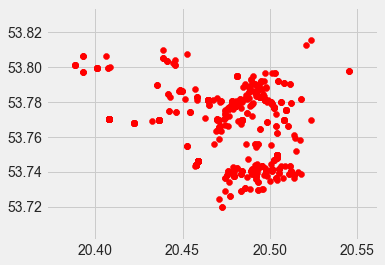

In [43]:
# We can now plot our ``GeoDataFrame``.
points.plot(color='red')
plt.show()

#### -  OSM data is download in QGIS
- done in QGIS 
- using plugin found in QGIS  OSMDownloader
- Processing Toolbox > GDAL/OGR > [OGR] Geoprocessing > Clip vectors by extent

In [62]:
df.columns

Index(['free_text', 'address', 'price', 'price_meter', 'rooms', 'area', 'more',
       'add_link', 'address_new', 'Longitude', 'Latitude', 'geometry'],
      dtype='object')

In [63]:
data = 'points_olsztyn.csv'
df = pd.read_csv(os.path.join(os.getcwd(), 'outputs', data))
df = df[['free_text', 'address', 'price', 'price_meter', 'rooms', 'area', 'more',
       'add_link', 'address_new', 'Longitude', 'Latitude']]
df.head()

,free_text,address,price,price_meter,rooms,area,more,add_link,address_new,Longitude,Latitude
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459 000 zł,16 393 zł/m²,2 pokoje,28 m²,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...,"Olimpijska 21, Likusy, Olsztyn, warmińsko-mazu...",20.441561,53.784478
1,Przestronne 3pokojowe mieszkanie w Centrum Jarot!,Mieszkanie na sprzedaż: ul. Floriana Piotrowsk...,630 000 zł,9251 zł/m²,3 pokoje,"68,1 m²",Biuro nieruchomości,/pl/oferta/przestronne-3pokojowe-mieszkanie-w-...,"Floriana Piotrowskiego, Jaroty, Olsztyn, warmi...",20.492239,53.737495
2,Mieszkanie 3 pokoje Pieczewo Olsztyn,Mieszkanie na sprzedaż: ul. Władysława Gębika ...,549 000 zł,8318 zł/m²,3 pokoje,66 m²,Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-pieczewo-olszty...,"Władysława Gębika 59, Pieczewo, Olsztyn, warmi...",20.513795,53.736222
3,Mieszkanie 3 pokoje świetna lokalizacja Olsztyn,Mieszkanie na sprzedaż: ul. Mieczysława Orłowi...,429 000 zł,7103 zł/m²,3 pokoje,"60,4 m²",Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-swietna-lokaliz...,"Mieczysława Orłowicza 10, Nagórki, Olsztyn, wa...",20.492031,53.754373
4,"OKAZJA 3 pok podleśna BOROWA, NOWE BUDOWNICTWO...","Mieszkanie na sprzedaż: ul. Borowa, Podleśna, ...",520 000 zł,10 000 zł/m²,3 pokoje,52 m²,52 m²,/pl/oferta/okazja-3-pok-podlesna-borowa-nowe-b...,"Borowa, Podleśna, Olsztyn, warmińsko-mazurskie",20.503198,53.796634


In [64]:
# converting dataframe  to geodataframe "EPSG:4326"
points = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)).set_crs("EPSG:4326")

In [81]:
lines_major = geopandas.read_file(os.path.join(path, 'inputs', 'main_routes'))
lines_all = geopandas.read_file(os.path.join(path, 'inputs', 'all_lines'))
all_lines_cliped = geopandas.read_file(os.path.join(path, 'inputs', 'all_lines_cliped')) 
points_shp = geopandas.read_file(os.path.join(path, 'inputs', 'points_shp'))

In [82]:
all_lines_cliped.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

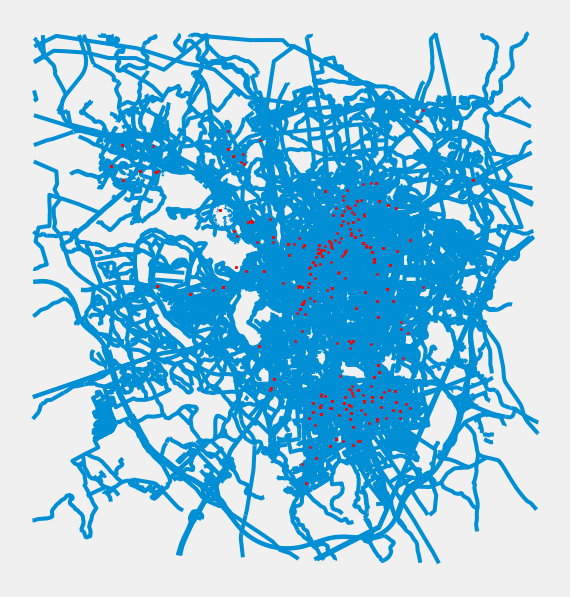

In [93]:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
# We restrict to South America.
fig, ax = plt.subplots(figsize=(10,10))
all_lines_cliped.plot(ax=ax, zorder=1)
points_shp.plot(ax=ax, color='red', markersize=5, zorder=2)
ax.set_axis_off()
plt.show()

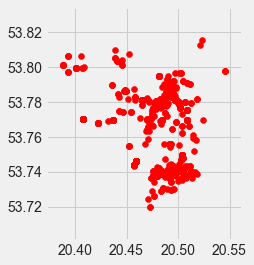

In [87]:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
# We restrict to South America.
points_shp.plot(color='red')


In [86]:
points_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich